# Probability Distributions Assignments

⭐ Import **numpy**, **pandas**, **scipy.stats**, **seaborn**, and **matplotlib.pyplot** libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

import warnings
warnings.filterwarnings('ignore') # Hide warnings

%matplotlib inline

## Exercise 1

A salesperson has found that the probability of a sale on a single contact is approximately 0.3. If the salesperson contacts 10 prospects, what is the approximate probability of making at least one sale?

In [6]:
p = 0.3 # success
n = 10 # trial
k = 0 

1 - stats.binom.pmf(k, n, p) # by using pmf method (pmf - probability mass function)

0.9717524751000001

In [3]:
1 - stats.binom.cdf(k, n, p)   # by using cdf method

0.9717524751

## Exercise 2

The cycle time for trucks hauling concrete to a highway construction site is uniformly distributed over the interval 50 to 70 minutes.

What is the probability that the cycle time exceeds 65 minutes if it is known that the cycle time exceeds 55 minutes?

In [7]:
# The probability that the cycle time exceeds 55 minutes is:
x = 1 - stats.uniform.cdf(55, loc=50, scale=20)
x

0.75

In [8]:
# The probability that the cycle time exceeds 65 minutes is:
y = 1 - stats.uniform.cdf(65, loc=50, scale=20)
y

0.25

In [9]:
# Given that the cycle time exceeds 55 minutes, the probabily that it exceeds 65 minutes is:
y / x

0.3333333333333333

In [10]:
###########

In [11]:
a = 50
b = 70

unifDist = stats.uniform(a, b-a)

In [12]:
#Event A

pA = 1 - unifDist.cdf(65)
pA

0.25

In [13]:
#Event B

pB = 1 - unifDist.cdf(55)
pB

0.75

In [14]:
# Prob of A given B

pA/pB

0.3333333333333333

## Exercise 3

The width of bolts of fabric is normally distributed with mean 950 mm (millimeters) and standard deviation 10 mm.

1. What is the probability that a randomly chosen bolt has a width of between 947 and 958mm?

In [15]:
mu = 950
sigma = 10
x1 = 947
x2 = 958

stats.norm.cdf(x2, mu, sigma) - stats.norm.cdf(x1, mu, sigma) # cdf - cumulative distribution function

0.406056023605556

2. What is the appropriate value for C such that a randomly chosen bolt has a width less than C with probability .8531?

In [18]:
stats.norm.ppf(0.8531) #z-score

1.0498219096264123

In [55]:
stats.norm.cdf(1.0498219096264123)

0.8531

In [19]:
mu = 950
sigma = 10
p = 0.8531

stats.norm.ppf(p, mu, sigma) #Use ppf method to calculate rv (ppf - percent point function)

960.4982190962642

## Exercise 5

What is the normal body temperature for healthy humans? A random sample of 130 healthy human body temperatures provided by Allen Shoemaker yielded 98.25 degrees and standard deviation 0.73 degrees. Give a 99% confidence interval for the average body temperature of healthy people.

In [20]:
n = 130
xbar = 98.25
std = 0.73
ci = 0.99

se = std / np.sqrt(n)
se

0.06402523540941313

In [21]:
#moe = z * se
z = stats.norm.ppf(0.995)
z

2.5758293035489004

In [22]:
moe = z * se
moe

0.16491807753418303

In [23]:
# CI -->  (lower, upper)

lower = xbar - moe
upper = xbar + moe

In [24]:
lower

98.08508192246582

In [21]:
upper

98.41491807753418

In [25]:
stats.norm.interval(ci, loc=xbar, scale=se) #by using normal distribution

(98.08508192246582, 98.41491807753418)

In [26]:
stats.t.interval(alpha=ci, df=n-1, loc=xbar, scale=std/np.sqrt(n))  #by using t distribution

(98.08260738705933, 98.41739261294067)

In [23]:
stats.t.ppf(0.995, df=129)

2.614478679699783

In [24]:
stats.norm.ppf(0.995)

2.5758293035489004

# What's Normal? -- Temperature, Gender, and Heart Rate

## The Data

- We will study with a dataset on body temperature, gender, and heart rate.
- We'll try to understand the concepts like 
    - true means, 
    - confidence intervals, 
    - t-statistics, 
    - t-tests, 
    - the normal distribution, and 
    - regression.


- The data were derived from an article in the Journal of the American Medical Association entitled "A Critical Appraisal of 98.6 Degrees F, the Upper Limit of the Normal Body Temperature, and Other Legacies of Carl Reinhold August Wunderlich" (Mackowiak, Wasserman, and Levine 1992).
- Source: http://jse.amstat.org/v4n2/datasets.shoemaker.html

## Data Column Reference

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-0lax{text-align:left;vertical-align:top}
.tg .tg-0pky{border-color:inherit;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-0lax">Variable</th>
    <th class="tg-0lax">Type</th>
    <th class="tg-0lax">Explanation</th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-0pky">temperature</td>
    <td class="tg-0pky">Numeric</td>
    <td class="tg-0pky">Body Temperature (degrees Fahrenheit)</td>
  </tr>
  <tr>
    <td class="tg-0pky">gender</td>
    <td class="tg-0pky">Categorical</td>
    <td class="tg-0pky">Gender (1=Male, 2=Female)</td>
  </tr>
  <tr>
    <td class="tg-0lax">heart_rate</td>
    <td class="tg-0lax">Numeric</td>
    <td class="tg-0lax">Heart Rate (beats per minute)</td>
  </tr>
</tbody>
</table>

## Data Preperation

⭐Run the following code to read in the "normtemp.dat.txt" file.

In [27]:
df = pd.read_csv('http://jse.amstat.org/datasets/normtemp.dat.txt', 
                 delim_whitespace=True, names=["temperature", "gender", "heart_rate"])

⭐Show first 5 rows

In [28]:
df.head()

,temperature,gender,heart_rate
0,96.3,1,70
1,96.7,1,71
2,96.9,1,74
3,97.0,1,80
4,97.1,1,73


⭐Show dataframe info

In [29]:
df.shape

(130, 3)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 130 entries, 0 to 129
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  130 non-null    float64
 1   gender       130 non-null    int64  
 2   heart_rate   130 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 3.2 KB


In [31]:
df.describe()

,temperature,gender,heart_rate
count,130.000000,130.000000,130.000000
mean,98.249231,1.500000,73.761538
std,0.733183,0.501934,7.062077
min,96.300000,1.000000,57.000000
25%,97.800000,1.000000,69.000000
50%,98.300000,1.500000,74.000000
75%,98.700000,2.000000,79.000000
max,100.800000,2.000000,89.000000


⭐Replace the gender levels [1, 2]  with ["male", "female"]

In [32]:
df.gender = df.gender.map({1:'male', 2:'female'})

In [33]:
df.gender.value_counts()

female    65
male      65
Name: gender, dtype: int64

In [34]:
df.head()

,temperature,gender,heart_rate
0,96.3,male,70
1,96.7,male,71
2,96.9,male,74
3,97.0,male,80
4,97.1,male,73


## Task-1. Is the *body temperature* population mean  98.6 degrees F?

⭐What is the mean for body temperature?

In [35]:
df.temperature.mean()

98.24923076923076

⭐What is the standard deviation for body temperature?

In [36]:
df.temperature.std()

0.7331831580389456

⭐What is the standard error of the mean for body temperature?

In [37]:
sem = df.temperature.std() / np.sqrt(len(df))
sem

0.06430441683789102

In [38]:
stats.sem(df.temperature)

0.06430441683789102

In [39]:
df.temperature.sem()

0.06430441683789102

⭐Plot the distribution of body temperature. You can either use *Pandas* or *Seaborn*.

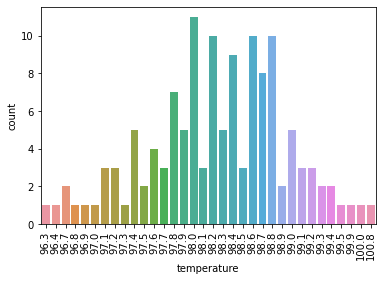

In [40]:
sns.countplot(df.temperature)
plt.xticks(rotation = 90);

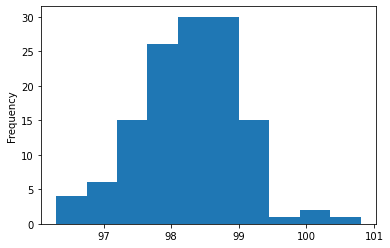

In [41]:
df.temperature.plot(kind='hist');

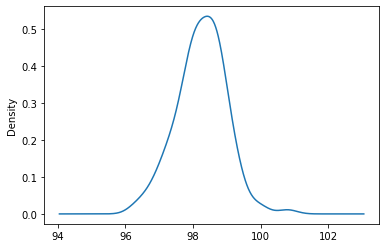

In [42]:
df.temperature.plot.density();

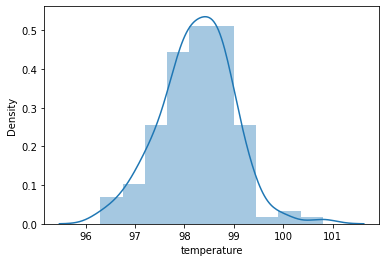

In [43]:
sns.distplot(df.temperature, hist=True, kde=True, bins=10);

⭐Investigate the given task by calculating the confidence interval for this sample of 130 subjects. (Use 90%, 95% and 99% CIs)

In [46]:
n = len(df)
mu = df.temperature.mean()
sigma = df.temperature.std()
sem = df.temperature.std() / np.sqrt(len(df))
ci1 = 0.90
ci2 = 0.95
ci3 = 0.99

In [47]:
print('90% :',stats.t.interval(0.90, df=129, loc=df.temperature.mean(),
                               scale=df.temperature.sem()))
print('95% :',stats.t.interval(0.95, df=129, loc=df.temperature.mean(),
                               scale=df.temperature.sem()))
print('99% :',stats.t.interval(0.99, df=129, loc=df.temperature.mean(),
                               scale=df.temperature.sem()))

90% : (98.14269432413488, 98.35576721432665)
95% : (98.12200290560803, 98.3764586328535)
99% : (98.08110824239758, 98.41735329606395)


In [48]:
print('90% :', stats.norm.interval(ci1, mu, sem))
print('95% :', stats.norm.interval(ci2, mu, sem))
print('99% :', stats.norm.interval(ci3, mu, sem))

90% : (98.14345941596596, 98.35500212249556)
95% : (98.12319642818164, 98.37526511027988)
99% : (98.0835935679921, 98.41486797046943)


Output will look like this:

CI 90%: (98.14269432413488, 98.35576721432665)

CI 95%: (98.12200290560803, 98.3764586328535)

CI 99%: (98.08110824239758, 98.41735329606395)

⭐Visualize confidence intervals by using visualization libraries. (Use 90%, 95% and 99% CIs)

In [49]:
lower = []
upper = []
for i in [0.90, 0.95, 0.99]:
    ci = stats.t.interval(i, df=len(df)-1, loc=df.temperature.mean(), 
                          scale=df.temperature.sem())
    lower.append(ci[0])
    upper.append(ci[1])
    print('CI {i}%: {interval}'.format(i=int(i*100), interval=ci))

CI 90%: (98.14269432413488, 98.35576721432665)
CI 95%: (98.12200290560803, 98.3764586328535)
CI 99%: (98.08110824239758, 98.41735329606395)


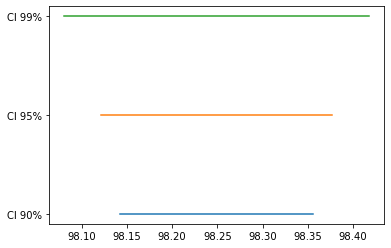

In [50]:
plt.plot((lower, upper), (range(len(lower)),range(len(upper))))
plt.yticks(range(3), ["CI 90%", "CI 95%", "CI 99%"]);

⭐**Investigate the given task by using One Sample t Test.**

___🚀First, check the normality. *Use scipy.stats.shapiro

<i>H<i/><sub>0</sub>: "the variable is normally distributed"<br>
<i>H<i/><sub>1</sub>: "the variable is not normally distributed"

In [51]:
# Create stat variable for Test Statistic
stats.shapiro(df.temperature)

ShapiroResult(statistic=0.9865770936012268, pvalue=0.233174666762352)

In [52]:
# Create p variable for p-value
stat, p = stats.shapiro(df.temperature)
# We cannot reject the null hypothesis. We can assume that the variable is normally distributed.

In [53]:
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.987, p=0.233
Sample looks Gaussian (fail to reject H0)


___🚀Then, conduct the significance test. *Use scipy.stats.ttest_1samp*

In [54]:
#H0: mu = 98.6
#H1: mu =! 98.6

In [55]:
# population mean 98.6 olarak varsayildiginda
stats.ttest_1samp(df.temperature, 98.6)

Ttest_1sampResult(statistic=-5.454823292364077, pvalue=2.410632041561008e-07)

In [50]:
2 * stats.t.cdf(-5.454823292364077, df=129)

2.410632041561008e-07

In [73]:
(df.temperature.mean() - 98.6) / (df.temperature.std()/np.sqrt(len(df)))

-5.454823292364298

In [74]:
stats.t.ppf(stats.t.cdf(-5.454823292364077, df=129), df=129)

-5.4548232923629785

The sample standard deviation is .73, so the standard error of the mean is .064. Thus the calculated t (using the sample mean of 98.25) is -5.45.

## Task-2. Is There a Significant Difference Between Males and Females in Normal Temperature?

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

⭐Show descriptives for 2 groups

In [56]:
df.head()

,temperature,gender,heart_rate
0,96.3,male,70
1,96.7,male,71
2,96.9,male,74
3,97.0,male,80
4,97.1,male,73


In [57]:
df.groupby("gender").describe()["temperature"]

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,65.0,98.393846,0.743488,96.4,98.0,98.4,98.8,100.8
male,65.0,98.104615,0.698756,96.3,97.6,98.1,98.6,99.5


In [58]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [60]:
df1 = df[df.gender == 'male'][['temperature']].describe()
df2 = df[df.gender == 'female'][['temperature']].describe()
display_side_by_side(df1,df2, titles=['Male','Female'])

,temperature
count,65.000000
mean,98.104615
std,0.698756
min,96.300000
25%,97.600000
50%,98.100000
75%,98.600000
max,99.500000
,temperature
count,65.000000


⭐Plot the histogram for both groups side-by-side.

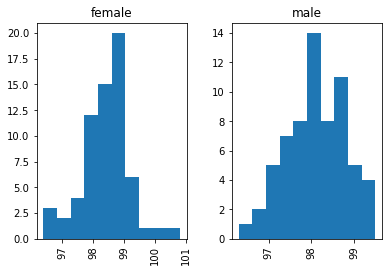

In [61]:
df.temperature.hist(by=df.gender)
plt.show()

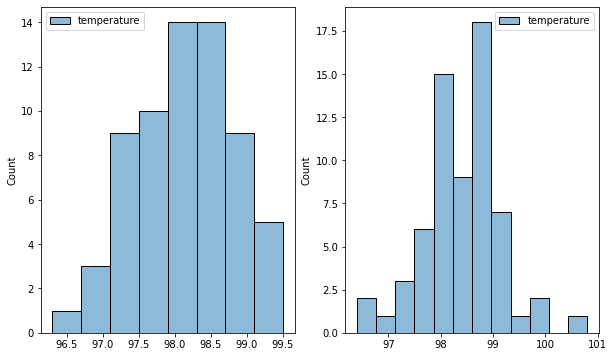

In [62]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
sns.histplot(df[df.gender == 'male'][['temperature']], ax=ax[0])
sns.histplot(df[df.gender == 'female'][['temperature']], ax=ax[1]);

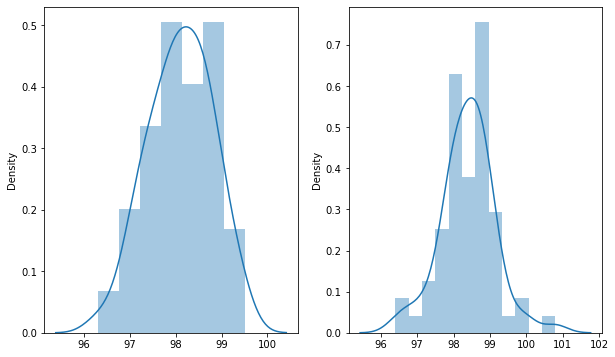

In [63]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
sns.distplot(df[df.gender == 'male'][['temperature']], ax=ax[0])
sns.distplot(df[df.gender == 'female'][['temperature']], ax=ax[1]);

⭐Plot the box plot for both groups side-by-side.

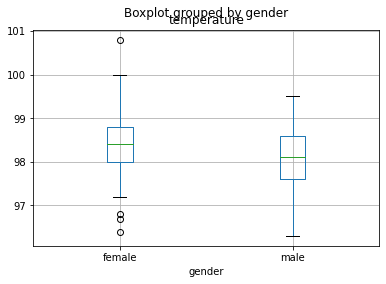

In [64]:
df.boxplot("temperature", by="gender")
plt.show()

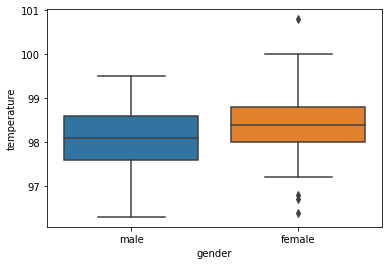

In [65]:
sns.boxplot(y=df.temperature, x=df.gender);

⭐**Investigate the given task by using Independent Samples t Test.**

___🚀First, check the normality for both groups. *Use scipy.stats.shapiro*

In [67]:
#Check the normality for male group

stat, p = stats.shapiro(df[df["gender"]=="male"]["temperature"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.989, p=0.855
Sample looks Gaussian (fail to reject H0)


In [69]:
#Check the normality for female group

stat, p = stats.shapiro(df[df["gender"]=="female"]["temperature"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.968, p=0.090
Sample looks Gaussian (fail to reject H0)


___🚀Test the assumption of homogeneity of variance
*Hint: Levene’s Test*

The hypotheses for Levene’s test are: 

<i>H<i/><sub>0</sub>: "the population variances of group 1 and 2 are equal"
    
<i>H<i/><sub>1</sub>: "the population variances of group 1 and 2 are not equal"

In [71]:
stat, p = stats.levene(df[df["gender"]=="female"]["temperature"],
                      df[df["gender"]=="male"]["temperature"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('The population variances of group 1 and 2 are equal (fail to reject H0)')
else:
    print('The population variances of group 1 and 2 are not equal (reject H0)')

Statistics=0.064, p=0.801
The population variances of group 1 and 2 are equal (fail to reject H0)


___🚀Conduct the significance test. Use scipy.stats.ttest_ind

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [72]:
stats.ttest_ind(df[df["gender"]=="female"]["temperature"],
                            df[df["gender"]=="male"]["temperature"], equal_var=True)

Ttest_indResult(statistic=2.2854345381654984, pvalue=0.02393188312240236)

In [73]:
twosample = stats.ttest_ind(df[df["gender"]=="female"]["temperature"],
                            df[df["gender"]=="male"]["temperature"], equal_var=True)

alpha = 0.05
p_value = twosample.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.


## Task-3. Is There a Relationship Between Body Temperature and Heart Rate?

⭐Plot the scatter plot

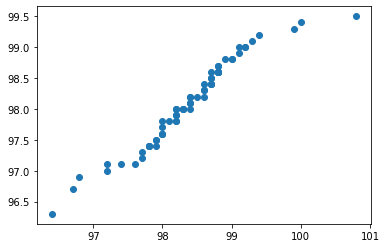

In [74]:
plt.scatter(df[df["gender"]=="female"]["temperature"],
               df[df["gender"]=="male"]["temperature"]);

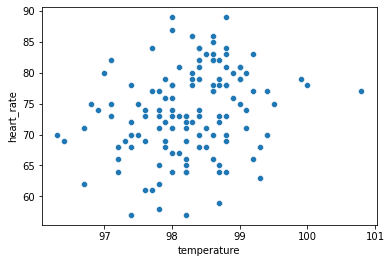

In [75]:
sns.scatterplot('temperature', 'heart_rate', data=df);

⭐Check the normality for heart rate variable

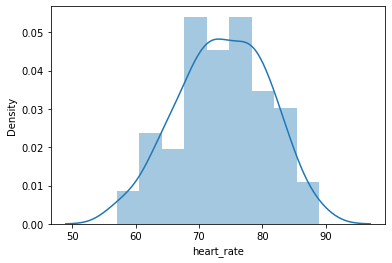

In [76]:
sns.distplot(df.heart_rate);

In [77]:
stat, p = stats.shapiro(df["heart_rate"])

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.989, p=0.355
Sample looks Gaussian (fail to reject H0)


⭐**Conduct a correlation test**, report Pearson’s correlation coefficient and two-tailed p-value. *Use scipy.stats.pearsonr*

Two-tailed significance test:

H0: ρ = 0 ("the population correlation coefficient is 0; there is no association")

H1: ρ ≠ 0 ("the population correlation coefficient is not 0; a nonzero correlation could exist")

In [78]:
stats.pearsonr(df.temperature, df.heart_rate)

(0.25365640272076423, 0.003591489250708228)

⭐**Find a regression equation** to predict heart rate from body temperature (Use scipy.stats).

In [79]:
stats.linregress(df.temperature, df.heart_rate)

LinregressResult(slope=2.443238038611884, intercept=-166.2847194182033, rvalue=0.25365640272076423, pvalue=0.003591489250708224, stderr=0.823519020914422, intercept_stderr=80.91234585505096)

In [80]:
res = stats.linregress(df.temperature, df.heart_rate)

In [81]:
res.slope

2.443238038611884

In [82]:
res.intercept

-166.2847194182033

⭐**Find a regression equation** to predict heart rate from body temperature (Use statsmodels).


In [83]:
# Regression equation -->  df.heart_rate = res.intercept + res.slope * df.temperature

In [84]:
import statsmodels.api as sm

In [86]:
X = df.temperature
Y = df.heart_rate

In [87]:
X = sm.add_constant(X) # adding a constant

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

In [88]:
print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:             heart_rate   R-squared:                       0.064
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     8.802
Date:                Sun, 02 Jan 2022   Prob (F-statistic):            0.00359
Time:                        16:31:39   Log-Likelihood:                -433.75
No. Observations:                 130   AIC:                             871.5
Df Residuals:                     128   BIC:                             877.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        -166.2847     80.912     -2.055      

⭐Calculate the predicted heart rate of a person at the temperature 97 F.

In [89]:
temp = 97
res.slope * temp + res.intercept

70.70937032714943

⭐How much of the variation of the heart_rate variable is explained by the temperature variable? *Coefficient of determination (R-squared):*

In [90]:
res.rvalue ** 2

0.06434157064123852

In [91]:
model.rsquared  #via statsmodels

0.06434157064123847

In [92]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [93]:
p = predictions.to_frame()

In [94]:
display_side_by_side(df[['temperature']],p, titles=['Temperature','Predictions'])

,temperature
0,96.3
1,96.7
2,96.9
3,97.0
4,97.1
5,97.1
6,97.1
7,97.2
8,97.3
9,97.4


In [95]:
temp = 96.3
res.slope * temp + res.intercept

68.99910370012111

# Spring 2014 Semester Survey

## The Data

- This dataset contains survey results from 435 students enrolled at a university in the United States. The survey was conducted during the Spring 2014 semester.

- This data was simulated using random number generation.

- Source: Kent State University (https://www.kent.edu/)

- Data Description can be found at: https://libguides.library.kent.edu/ld.php?content_id=11205386

⭐Run the following code to read the dataset.

In [96]:
survey = pd.read_csv('students_2014.csv')

In [97]:
survey.head()

,ids,bday,enrolldate,expgradate,Rank,Major,Gender,Athlete,Height,Weight,...,English,Reading,Math,Writing,State,LiveOnCampus,HowCommute,CommuteTime,SleepTime,StudyTime
0,43783,3/22/1995,,,,,0,0,72.35,,...,88.24,81.5,60.02,81.44,In state,1,,,7,1
1,20278,1/1/1995,,,,Philosophy,0,0,70.66,179.2,...,89.45,85.25,70.19,73.27,,1,,,5,2
2,20389,12/31/1994,,,,,0,0,70.68,198.52,...,96.73,86.88,71.2,84.24,In state,,,,8,7
3,22820,12/1/1994,,,,business administration,1,0,,198.34,...,74.06,88.68,55.89,73.16,In state,1,,,2,6
4,24559,11/10/1994,,,,,1,1,67.43,128.17,...,82.61,77.3,65.52,80.45,Out of state,1,,,7,3


⭐Know your data

In [98]:
survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 435 entries, 0 to 434
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ids           435 non-null    int64 
 1   bday          435 non-null    object
 2   enrolldate    435 non-null    object
 3   expgradate    435 non-null    object
 4   Rank          435 non-null    object
 5   Major         434 non-null    object
 6   Gender        435 non-null    object
 7   Athlete       435 non-null    int64 
 8   Height        435 non-null    object
 9   Weight        435 non-null    object
 10  Smoking       435 non-null    object
 11  Sprint        435 non-null    object
 12  MileMinDur    435 non-null    object
 13  English       435 non-null    object
 14  Reading       435 non-null    object
 15  Math          435 non-null    object
 16  Writing       435 non-null    object
 17  State         435 non-null    object
 18  LiveOnCampus  435 non-null    object
 19  HowCommu

⭐Change Math, English, Reading, and Writing colums to numeric. *Use pd.to_numeric*

In [99]:
survey["Math"] = pd.to_numeric(survey["Math"],errors='coerce')
survey["English"] = pd.to_numeric(survey["English"],errors='coerce')
survey["Reading"] = pd.to_numeric(survey["Reading"],errors='coerce')
survey["Writing"] = pd.to_numeric(survey["Writing"],errors='coerce')

## Task-1. Paired Samples t Test

The sample dataset has placement test scores (out of 100 points) for four subject areas: English, Reading, Math, and Writing. Students in the sample completed all 4 placement tests when they enrolled in the university. Suppose we are particularly interested in the **English** and **Math** sections, and want to determine whether students tended to score higher on their English or Math test, on average. 

⭐Show descriptives for the two sections

In [100]:
survey.describe()[['English', 'Math']].T

,count,mean,std,min,25%,50%,75%,max
English,409.0,82.787555,6.839803,59.83,78.3300,83.150,87.1700,101.95
Math,422.0,65.468009,8.375930,35.32,60.2025,65.445,70.5675,93.78


⭐Plot the histogram for both groups side-by-side.

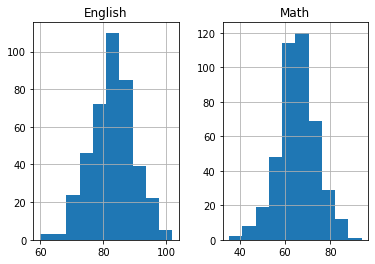

In [101]:
survey[['English', 'Math']].hist();

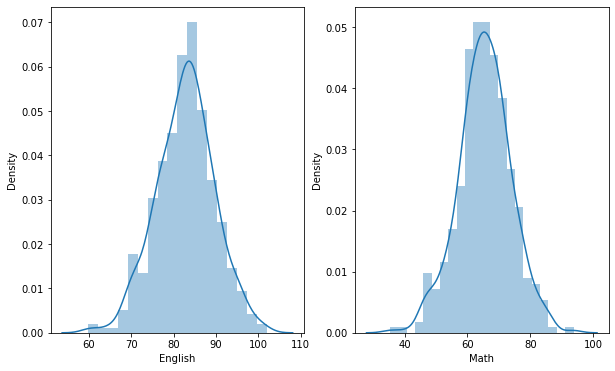

In [102]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6))
sns.distplot(survey[['English', 'Math']]['English'], ax=ax[0])
sns.distplot(survey[['English', 'Math']]['Math'], ax=ax[1]);

⭐Plot the box plot for both variables side-by-side.

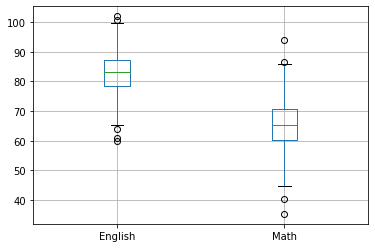

In [103]:
survey[['English', 'Math']].boxplot();

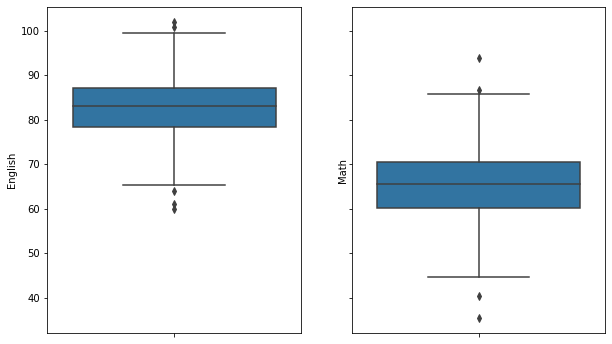

In [104]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,6), sharey=True)
sns.boxplot(y=survey[['English', 'Math']]['English'], ax=ax[0])
sns.boxplot(y=survey[['English', 'Math']]['Math'], ax=ax[1]);

⭐Create a paired dataset as named *pairset*. Remove missing values. *Use dropna*

In [105]:
survey[['English', 'Math']].isnull().sum()

English    26
Math       13
dtype: int64

In [106]:
pairset = survey[['English', 'Math']].dropna()
pairset.head()

,English,Math
0,88.24,60.02
1,89.45,70.19
2,96.73,71.20
3,74.06,55.89
4,82.61,65.52


⭐Conduct the significance test. Use *scipy.stats.ttest_rel*

#### This is a two-sided test for the null hypothesis that 2 related or repeated samples have identical average (expected) values.

H0: µ1 = µ2 ("the two population means are equal")

H1: µ1 ≠ µ2 ("the two population means are not equal")

In [107]:
stats.ttest_rel(pairset.Math, pairset.English)

Ttest_relResult(statistic=-36.312568981719856, pvalue=3.0710987192210606e-128)

In [108]:
pairedtest = stats.ttest_rel(pairset.Math, pairset.English)

alpha = 0.05
p_value = pairedtest.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.


⭐Compute pairwise correlation of sections (English, Reading, Math, and Writing), excluding NA/null values.

In [110]:
sections = ['Math', 'English', 'Reading', 'Writing']

sectionset = survey[sections].dropna()
sectionset.head()

,Math,English,Reading,Writing
0,60.02,88.24,81.50,81.44
1,70.19,89.45,85.25,73.27
2,71.20,96.73,86.88,84.24
3,55.89,74.06,88.68,73.16
4,65.52,82.61,77.30,80.45


In [111]:
sectionset.corr()

,Math,English,Reading,Writing
Math,1.000000,0.248545,0.518579,0.110113
English,0.248545,1.000000,0.338691,0.375107
Reading,0.518579,0.338691,1.000000,0.131742
Writing,0.110113,0.375107,0.131742,1.000000


# One-way ANOVA

In the sample dataset, the variable Sprint is the respondent's time (in seconds) to sprint a given distance, and Smoking is an indicator about whether or not the respondent smokes (0 = Nonsmoker, 1 = Past smoker, 2 = Current smoker). Let's use ANOVA to test if there is a statistically significant difference in sprint time with respect to smoking status. Sprint time will serve as the dependent variable, and smoking status will act as the independent variable.

The null and alternative hypotheses of one-way ANOVA can be expressed as:

H0: µ1 = µ2 = µ3  = ...   = µk   ("all k population means are equal")

H1: At least one µi different  ("at least one of the k population means is not equal to the others")

In [112]:
oneway = ["Sprint", "Smoking"]

onewayset = survey[oneway].dropna()
onewayset.head()

,Sprint,Smoking
0,7.978,0
1,8.004,0
2,,0
3,8.473,
4,,2


In [113]:
onewayset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Sprint   435 non-null    object
 1   Smoking  435 non-null    object
dtypes: object(2)
memory usage: 10.2+ KB


⭐Change Math, Sprint and Smoking columns to numeric. *Use pd.to_numeric*

In [114]:
onewayset["Sprint"] = pd.to_numeric(survey["Sprint"],errors='coerce')
onewayset["Smoking"] = pd.to_numeric(survey["Smoking"],errors='coerce')

In [115]:
onewayset["Smoking"] = onewayset["Smoking"].astype('category')

⭐Replace the Smoking levels [1, 2, 3]  with ["Nonsmoker", "Past smoker","Current smoker"]

In [116]:
onewayset["Smoking"] = onewayset["Smoking"].replace([0,1,2],["Nonsmoker", "Past smoker","Current smoker"])

onewayset["Smoking"]

0           Nonsmoker
1           Nonsmoker
2           Nonsmoker
3                 NaN
4      Current smoker
            ...      
430         Nonsmoker
431         Nonsmoker
432         Nonsmoker
433    Current smoker
434       Past smoker
Name: Smoking, Length: 435, dtype: object

In [117]:
onewayset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 435 entries, 0 to 434
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Sprint   374 non-null    float64
 1   Smoking  411 non-null    object 
dtypes: float64(1), object(1)
memory usage: 10.2+ KB


⭐Descriptive for each group

In [118]:
onewayset.groupby("Smoking").describe()["Sprint"]

,count,mean,std,min,25%,50%,75%,max
Smoking,,,,,,,,
Current smoker,59.0,7.120915,1.083500,5.295,6.2925,7.013,7.983,9.475
Nonsmoker,261.0,6.411487,1.251783,4.503,5.3600,6.326,7.337,9.597
Past smoker,33.0,6.835333,1.024415,4.889,6.0750,6.876,7.706,8.549


In [119]:
nonsmoker = onewayset[onewayset["Smoking"]=="Nonsmoker"]["Sprint"].dropna()
pastsmoker = onewayset[onewayset["Smoking"]=="Past smoker"]["Sprint"].dropna()
currentsmoker = onewayset[onewayset["Smoking"]=="Current smoker"]["Sprint"].dropna()

⭐Check normality assumption for each group

In [120]:
stat, p = stats.shapiro(currentsmoker)

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.969, p=0.137
Sample looks Gaussian (fail to reject H0)


In [121]:
stat, p = stats.shapiro(nonsmoker)

print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.960, p=0.000
Sample does not look Gaussian (reject H0)


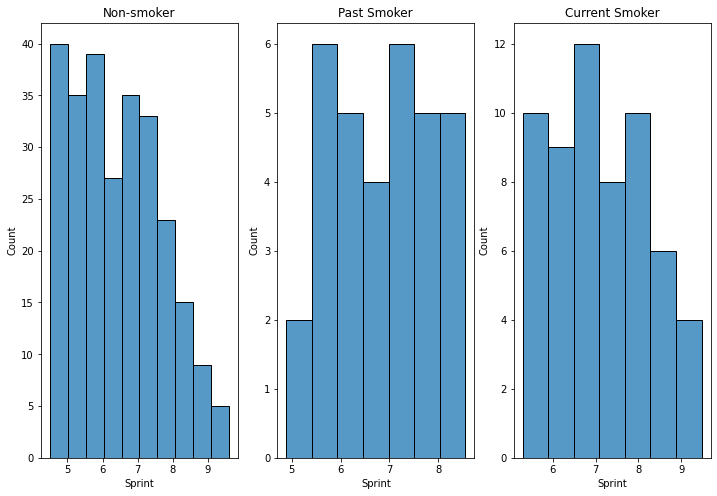

In [122]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(12,8))
sns.histplot(nonsmoker, ax=ax[0])
ax[0].set_title('Non-smoker')
sns.histplot(pastsmoker, ax=ax[1])
ax[1].set_title('Past Smoker')
sns.histplot(currentsmoker, ax=ax[2])
ax[2].set_title('Current Smoker');

⭐Run One-way ANOVA. *Use scipy.stats.f_oneway*

H0: µ1 = µ2 = µ3  = ...   = µk   ("all k population means are equal")

H1: At least one µi different  ("at least one of the k population means is not equal to the others")

In [123]:
stats.f_oneway(nonsmoker, pastsmoker, currentsmoker)

F_onewayResult(statistic=9.208599845380922, pvalue=0.00012659768158159465)

In [124]:
anova = stats.f_oneway(nonsmoker, pastsmoker, currentsmoker)

alpha = 0.05
p_value = anova.pvalue

if p_value<alpha:
    print('At {} level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.'.format(alpha))
else:
    print('At {} level of significance, we fail to reject the null hypothesis.'.format(alpha))

At 0.05 level of significance, we can reject the null hypothesis in favor of the alternative hypothesis.
